In [179]:
# Laboratorio 1 Image Processing

In [180]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Problema 1

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:
* Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
* Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
* Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
* Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y
verde.
* Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y
azul.
* Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y
rojo.

In [181]:
## función
def Filtro(img1,n):
    ImgFinal = np.zeros_like(img1)
    ImgB,ImgG,ImgR = cv2.split(img1)
   
    if n == 1:
        ImgFinal[:,:,2] = ImgB
    elif n ==2:
        ImgFinal[:,:,1] = ImgG
    elif n == 3:
        ImgFinal[:,:,0] = ImgR
    elif n == 10:
        ImgFinal[:,:,0:2] = cv2.merge([ImgR,ImgG])
    elif n == 20:
        ImgFinal[:,:,1:3] = cv2.merge([ImgG,ImgB])
    elif n == 30:
        ImgFinal[:,:,[0,2]] = cv2.merge([ImgR,ImgB])
    else:
        ImgFinal = img1
    
    return(ImgFinal)

        



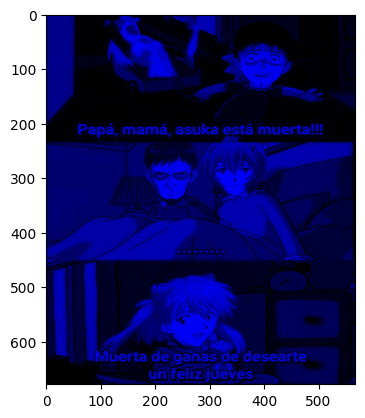

In [182]:
img = cv2.imread("jueves.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
n = int(input('Ingrese una de las opciones válidas'))
ImgFiltro = Filtro(img,n)
plt.imshow(ImgFiltro)
plt.show()

## Problema 2

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises, estas imágenes
fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se
construya la imagen original a color.

In [183]:
def ImagenFinal(ImR,ImG,ImB):
    ImgF = cv2.merge([ImR[:,:,0],ImG[:,:,1],ImB[:,:,2]])
    return(ImgF)

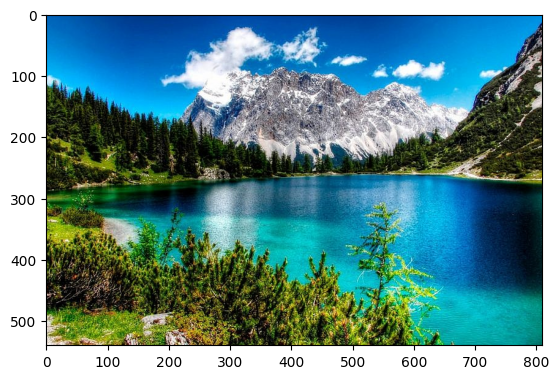

In [184]:
ImR = cv2.imread('imagen1/imagen1_salida_gray_rojo.jpg')
ImG = cv2.imread('imagen1/imagen1_salida_gray_verde.jpg')
ImB = cv2.imread('imagen1/imagen1_salida_gray_azul.jpg')

ImgF = ImagenFinal(ImR,ImG,ImB)
plt.imshow(ImgF)
plt.show()

## Problema 3

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [185]:
def splitting(ImgS):
    R,G,B = cv2.split(ImgS)
    plt.imshow(R,cmap = 'gray')
    plt.title('Escala de grises canal rojo')
    plt.show()
    plt.imshow(G,cmap = 'gray')
    plt.title('Escala de grises canal verde')
    plt.show()
    plt.imshow(B,cmap = 'gray')
    plt.title('Escala de grises canal azul')
    plt.show()    
    return(R,G,B)

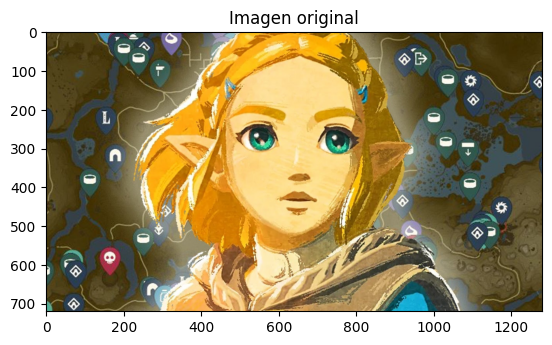

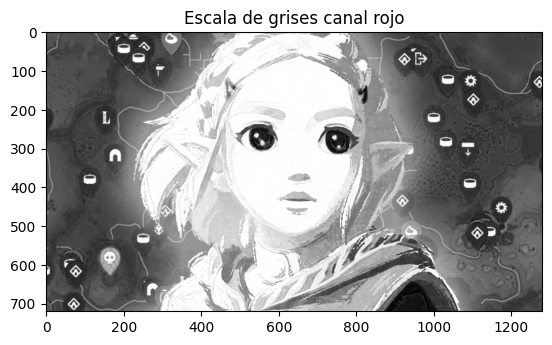

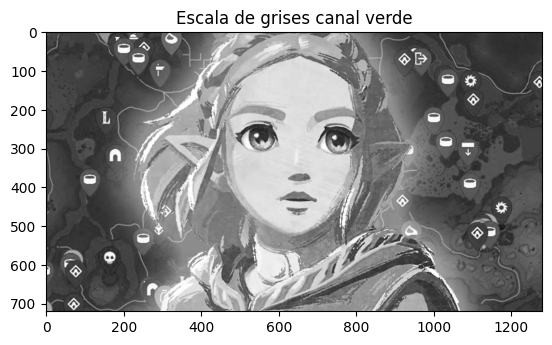

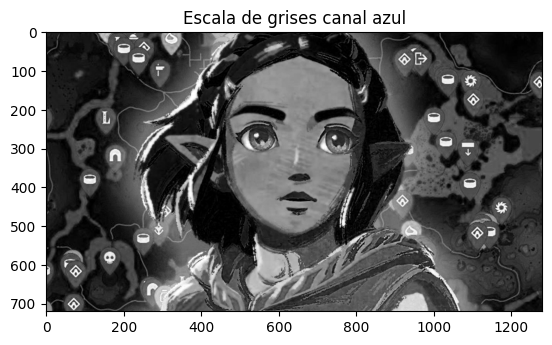

In [186]:
ImgSplit = cv2.imread('Zelda.jpg')
ImgSplit = cv2.cvtColor(ImgSplit, cv2.COLOR_BGR2RGB)
plt.imshow(ImgSplit)
plt.title('Imagen original')
plt.show()

IR, IG, IB = splitting(ImgSplit)


## Problema 4

Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribución.

In [187]:
import seaborn as sns

In [188]:
def hists(ImgH):
    R,G,B = cv2.split(ImgH)
    GrayS = (R+G+B)/3
    sns.histplot(R.ravel(), color = 'red', bins = 256)
    plt.title('histograma de escala de rojos')
    plt.axvline(np.mean(R.ravel()), color = 'black', linestyle = 'dashed')
    plt.show()
    sns.histplot(G.ravel(), color = 'darkgreen', bins = 256)
    plt.axvline(np.mean(G.ravel()), color = 'black', linestyle = 'dashed')
    plt.title('histograma de escala de verdes')
    plt.show()
    sns.histplot(B.ravel(), color = 'blue', bins = 256)
    plt.axvline(np.mean(B.ravel()), color = 'black', linestyle = 'dashed')
    plt.title('histograma de escala de azules')
    plt.show()
    sns.histplot(GrayS.ravel(), color = 'darkgray', bins = 256)
    plt.axvline(np.mean(GrayS.ravel()), color = 'black', linestyle = 'dashed')
    plt.title('histograma de escala de grises')
    plt.show()

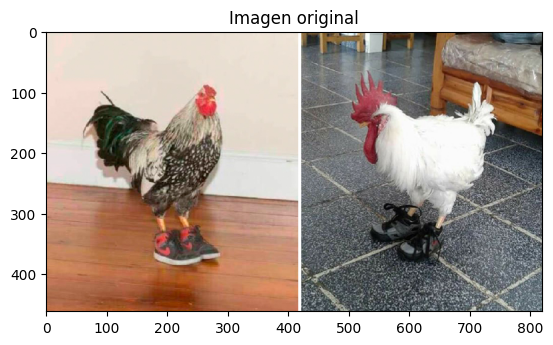

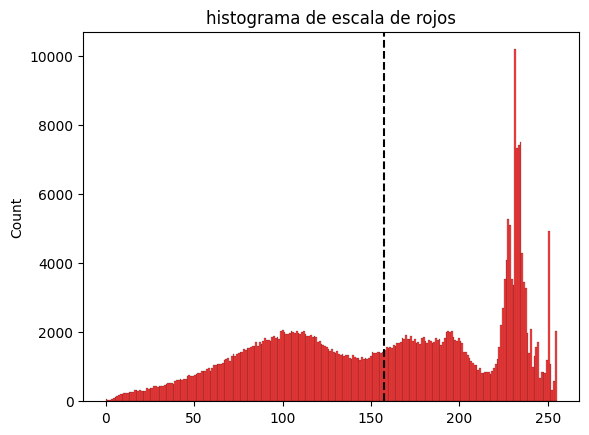

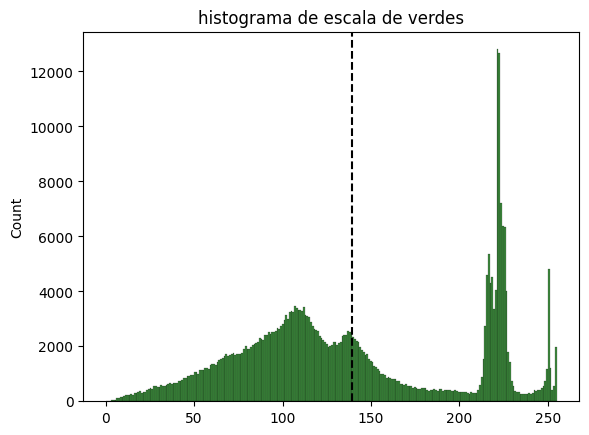

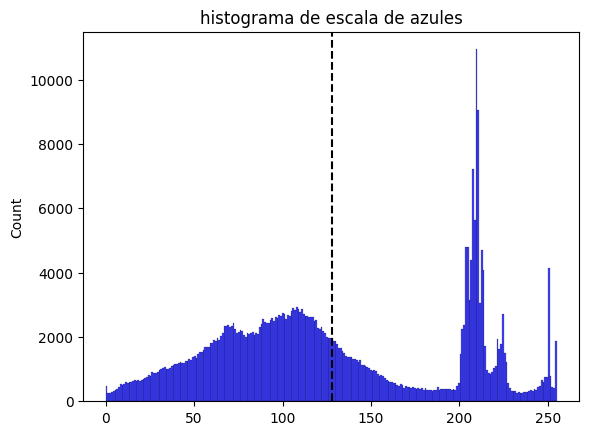

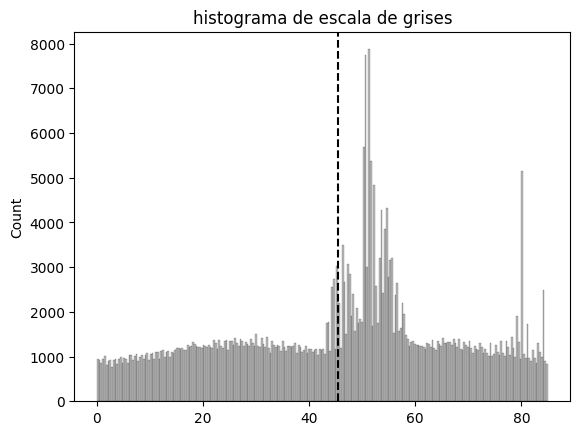

In [189]:
Img4 = cv2.imread('Gallo.jpg')
Img4 = cv2.cvtColor(Img4, cv2.COLOR_BGR2RGB)

plt.imshow(Img4)
plt.title('Imagen original')
plt.show()
hists(Img4)


## Espacio de color HSV

El modelo HSV, es un modelo de modelado del color creado por Alvy Ray Smith en 1978. Este usa las propiedades de **matiz**, **saturación** y **valor** (Hue, Saturation, Value) para definir la distribución de un color de una imagen. Mediante este modelo, se transforma el cubo que conforma el espacio RGB en un cono invertido; donde *Hue* es el ángulo polar del cono, *saturation* el radio del cono, y *value* la altura del segmento de cono. 

![Modelo HSV](HSV.ppm)

Para poder realizar la conversión del modelo **RGB** al **HSV**, es necesario seguir ciertas reglas. Estas se presentan en las siguientes imágenes:

![H](H.JPG)

![S](S.JPG)

![V](V.JPG)